In [94]:
using MAT
using PyPlot
using Seaborn
using ProgressMeter
include("megamap.jl")

simulate! (generic function with 1 method)

In [2]:
function convToJulia(arr)
    if length(arr) == 0
        return Vector{Float64}()
    elseif length(arr) == 1
        return [arr]
    else
        return Vector{Float64}(arr[:,1])
    end
end

convToJulia (generic function with 1 method)

In [3]:
predictedW = matread("../clusterResults/fittedW_1dm_grid_small_s.mat");
#predictedW = matread("../clusterResults/fittedW_1m_grid.mat");

In [102]:
vars = matread("../place_field_data.mat")
placeCenters = convToJulia.(vars["PF_centers"])[:,1];

In [103]:
targetMap = TargetMap(placeCenters; placeWidth=50.0);

In [127]:
W = predictedW["fittedW"]
forwardMap = ForwardMap(targetMap.fPeak, targetMap.inhibThres, targetMap.wI, W, zeros(size(W, 1)));
target = fTarget(50, targetMap);
inp = input(50, targetMap);
fPerStep = simulate!(forwardMap, inp; timesteps=1500)
convergance = [sum((fPerStep[t,:] .- target).^2) for t=1:1500];

In [128]:
fPerStepNoInp = simulate(forwardMap, zeros(size(W, 1)); timesteps=1500);

In [129]:
converganceNoInp = [sum((fPerStepNoInp[t,:] .- target).^2) for t=1:1500];

In [130]:
Seaborn.set_context("talk")
Seaborn.set_style("white")

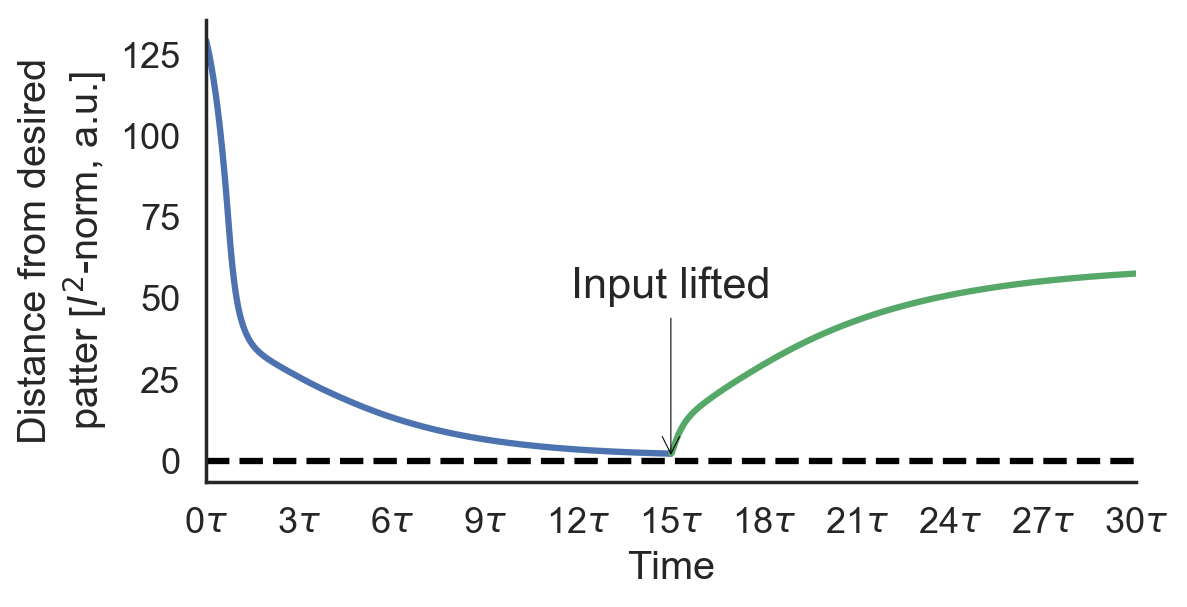

In [131]:
figure(figsize=(6,3), dpi=200)
axhline(0,c="k", ls="--")
plot((1:1500)*0.01, sqrt.(convergance))# ./ maximum(convergance))
plot((1501:3000)*0.01, sqrt.(converganceNoInp))
xlim(0,30)
xticks(0:3:30, ["$(i)\$\\tau\$" for i=0:3:30])
xlabel("Time")
ylabel("Distance from desired\npatter [\$l^2\$-norm, a.u.]")
annotate("Input lifted", (15, 0), (15, 50), horizontalalignment="center", arrowprops=Dict("arrowstyle"=> "->"))
Seaborn.seaborn[:despine]()

In [65]:
norrm)

norm (generic function with 11 methods)

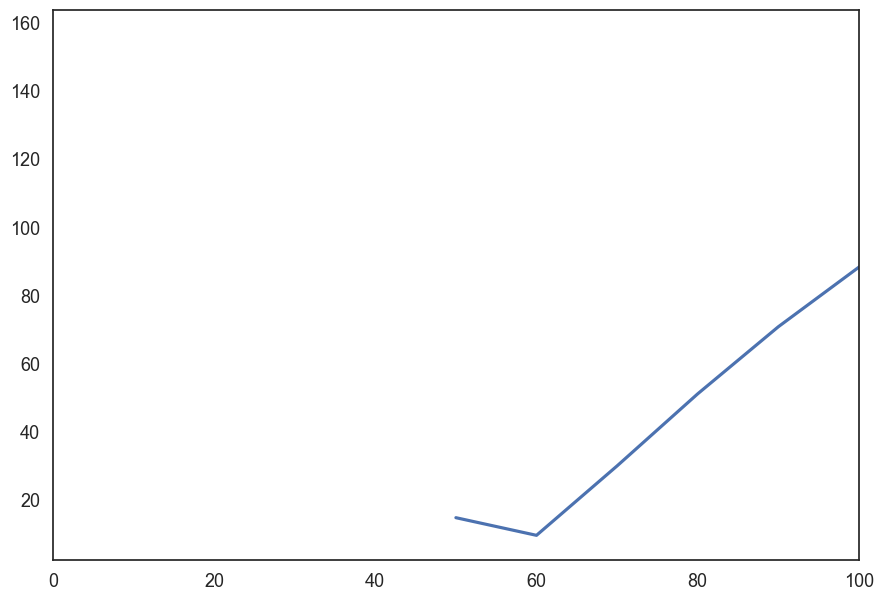

(0, 100)

In [126]:
plot(50:10:3950, [sqrt(sum((f- fPerStepNoInp[end,:]).^2)) for f in fTarget.(50:10:3950, targetMap)])
xlim(0,100)

800-element Array{Float64,1}:
  0.0    
  0.0    
  0.0    
  0.0    
  5.85328
  5.96445
  0.0    
  0.0    
  0.0    
  0.0    
  0.0    
  0.0    
  0.0    
  ⋮      
  0.0    
  0.0    
 10.7548 
  5.64856
  0.0    
  6.54433
  0.0    
  0.0    
  0.0    
  0.0    
  0.0    
  0.0    

In [ ]:
endConvergence = Vector{Float64}()
@showprogress 1 "Simulating..." for x=0:5:4000
    target = fTarget(x, targetMap);
    inp = input(x, targetMap);
    fPerStep = simulate(forwardMap, inp; timesteps=1500)
    #convergance = [sum((fPerStep[t,:] .- target).^2) for t=1:700];
    push!(endConvergence, sum((fPerStep[end,:] .- target).^2))
end

In [ ]:
Seaborn.set_context("talk")
Seaborn.set_style("white")

In [ ]:
figure(figsize=(6,3), dpi=200)
plot(0:5:4000, sqrt.(endConvergence));
xlabel("Distance [cm]")
ylabel("Distance from desired\npattern [\$l^2\$-norm, a.u.]")
#ylim(0,15000)
xlim(0,3900)
#for ep = predictedW["evaluationPoints"]
#    axvline(ep, c="k", alpha=.5, lw=1)
#end
axhline(0, c="k", ls="--")
Seaborn.seaborn[:despine]()

In [ ]:
extrema(W)

In [ ]:
imshow(forwardMap.W, cmap="magma", vmin=0.0, vmax=0.007)
colorbar(orientation="horizontal", shrink=0.52, pad=0.1)#, )